In [36]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import math 

# Pair Programming Normalización

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.


En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:

- Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste

- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [37]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [38]:
df = pd.read_csv('datos/soci_econ_country_profiles_v3.csv', index_col=0)
df.head()

,country,Region,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Agricultural production index (2004-2006=100),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births,Seats held by women in national parliaments %,Individuals using the Internet (per 100 inhabitants),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Affordability Index,Cost Of Living Index,Consumer price index (2010 = 100),Current health expenditure (% of GDP),Human capital index (HCI) (scale 0-1),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Labour force participation (male pop. %),"Pop. using improved drinking water (urban, %)","Pop. using improved drinking water (rural, %)","Population age distribution (0-14, %)","Population age distribution (60+ years, %)",Education: Secondary gross enrol. ratio (per 100 pop.),Education: Tertiary gross enrol. ratio (per 100 pop.)
0,Argentina,SouthAmerica,14564.5,2.0,73.1,119,91.8,1.0,2.3,13.7,38.9,256,85,99.0,139.59,58.40,37.37,73.30,12.07,37.95,53.33,90.67,0.30,52.57,112.887108,9.124315,0.611,NaN,76.372000,74.4,96.2,98.3,24.9,15.4,106.85,83.20
1,Australia,Oceania,51352.2,2.7,76.1,111,89.4,1.5,1.9,3.9,28.7,948,222,100.0,176.54,101.94,57.58,74.25,9.24,34.73,24.58,72.79,1.41,80.66,115.686785,9.205948,0.803,1.948647,82.500000,70.7,100.0,100.0,19.0,21.0,137.45,90.85
2,Austria,WesternEurope,44117.7,4.7,69.7,108,66.0,0.4,1.4,3.3,30.6,118,158,100.0,190.37,95.66,80.75,80.91,9.66,26.27,21.90,62.13,1.69,71.52,113.999737,10.396617,0.793,2.081269,81.643902,65.8,100.0,100.0,14.1,25.1,100.00,81.75
3,Belarus,EasternEurope,5750.8,9.6,58.4,122,76.7,0.0,1.6,3.6,34.5,25,122,99.9,119.23,36.43,77.74,53.76,18.73,27.66,39.64,20.07,0.17,33.84,NaN,5.925786,NaN,6.031837,74.129268,67.8,94.1,95.2,16.7,21.3,107.10,88.30
4,Belgium,WesternEurope,40277.8,1.2,77.6,108,97.9,0.5,1.8,3.5,38.0,37,196,100.0,160.52,91.02,55.49,78.92,6.96,36.26,48.92,75.16,2.24,75.36,113.128903,10.338669,0.757,2.125971,81.492683,58.9,99.5,99.4,17.1,24.6,167.05,75.20


### Metodo Manual

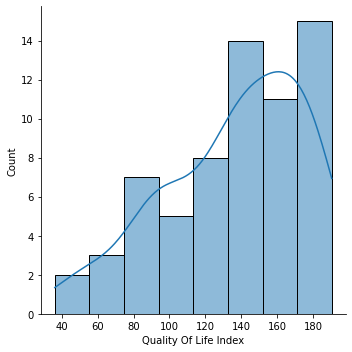

In [39]:
sns.displot(x='Quality Of Life Index', data=df, kde=True)

In [40]:
stats.shapiro(df["Quality Of Life Index"])

ShapiroResult(statistic=0.9352680444717407, pvalue=0.0020942906849086285)

In [41]:
media = df["Quality Of Life Index"].mean()
maximo = df["Quality Of Life Index"].max() 
minimo = df["Quality Of Life Index"].min()

In [42]:
df["QOL_NORM"] = (df["Quality Of Life Index"] - media) / (maximo - minimo )

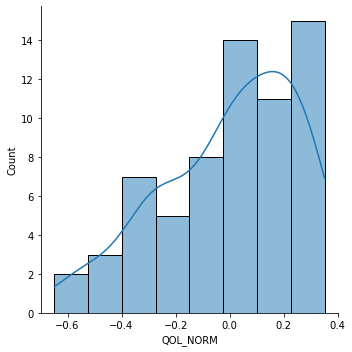

In [43]:
sns.displot(x='QOL_NORM', data=df, kde=True)

In [44]:
stats.shapiro(df["QOL_NORM"])

ShapiroResult(statistic=0.9352684020996094, pvalue=0.002094366354867816)

### Método Logarítmica

In [45]:
df["QOL_LOG"] = df["Quality Of Life Index"].apply(lambda x: np.log(x) if x > 0 else 0)

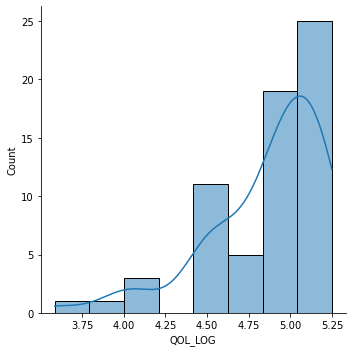

In [46]:
sns.displot(x='QOL_LOG', data=df, kde=True)

In [47]:
stats.shapiro(df["QOL_LOG"])

ShapiroResult(statistic=0.8544697761535645, pvalue=1.9384474398975726e-06)

### Método Raíz Cuadrado

In [48]:
df["QOL_RAIZ"] = df["Quality Of Life Index"].apply(lambda x: math.sqrt(x))

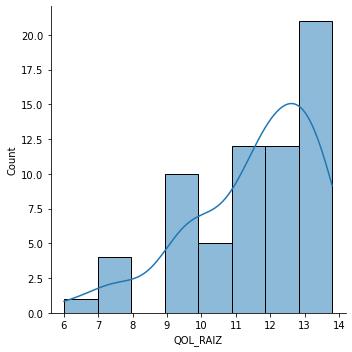

In [49]:
sns.displot(x='QOL_RAIZ', data=df, kde=True)

### Método MinMaxScaler

In [51]:
numericas = df.select_dtypes(include = np.number)
minmax = MinMaxScaler()
minmax.fit(df[['Quality Of Life Index']])

MinMaxScaler()

In [52]:
X_normalizadas = minmax.transform(df[["Quality Of Life Index"]])
numericas_minmax = pd.DataFrame(X_normalizadas, columns = ["QOL_MinMaxScaler"])

In [53]:
df["QOL_MinMaxScaler"] = numericas_minmax
df.head(2)

,country,Region,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Agricultural production index (2004-2006=100),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births,Seats held by women in national parliaments %,Individuals using the Internet (per 100 inhabitants),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Affordability Index,Cost Of Living Index,Consumer price index (2010 = 100),Current health expenditure (% of GDP),Human capital index (HCI) (scale 0-1),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Labour force participation (male pop. %),"Pop. using improved drinking water (urban, %)","Pop. using improved drinking water (rural, %)","Population age distribution (0-14, %)","Population age distribution (60+ years, %)",Education: Secondary gross enrol. ratio (per 100 pop.),Education: Tertiary gross enrol. ratio (per 100 pop.),QOL_NORM,QOL_LOG,QOL_RAIZ,QOL_MinMaxScaler
0,Argentina,SouthAmerica,14564.5,2.0,73.1,119,91.8,1.0,2.3,13.7,38.9,256,85,99.0,139.59,58.40,37.37,73.30,12.07,37.95,53.33,90.67,0.30,52.57,112.887108,9.124315,0.611,NaN,76.372,74.4,96.2,98.3,24.9,15.4,106.85,83.20,0.022280,4.938710,11.814821,0.670794
1,Australia,Oceania,51352.2,2.7,76.1,111,89.4,1.5,1.9,3.9,28.7,948,222,100.0,176.54,101.94,57.58,74.25,9.24,34.73,24.58,72.79,1.41,80.66,115.686785,9.205948,0.803,1.948647,82.500,70.7,100.0,100.0,19.0,21.0,137.45,90.85,0.261826,5.173547,13.286836,0.910340


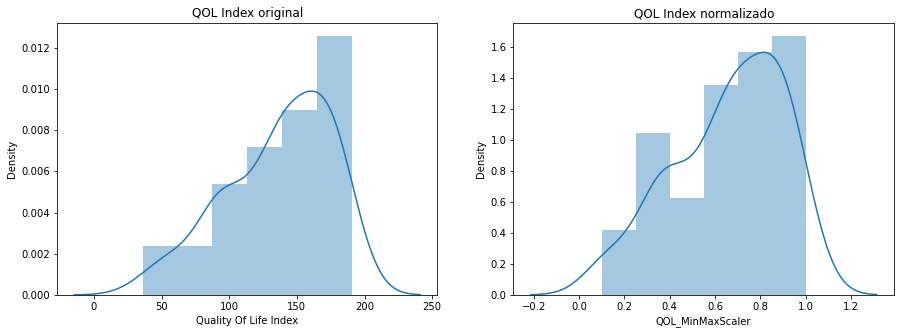

In [54]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('QOL Index original')
axes[1].set_title('QOL Index normalizado')

sns.distplot(df['Quality Of Life Index'] ,ax = axes[0])
sns.distplot(df['QOL_MinMaxScaler'], ax = axes[1]);

In [55]:
stats.shapiro(df["QOL_MinMaxScaler"])

ShapiroResult(statistic=nan, pvalue=1.0)

### Método BoxCox

In [56]:
df['QOL_BOX'], lambda_ajustada = stats.boxcox(df['Quality Of Life Index'])

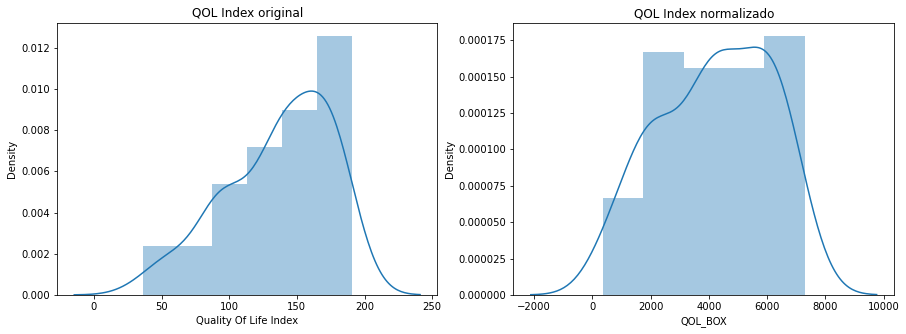

In [57]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('QOL Index original')
axes[1].set_title('QOL Index normalizado')

sns.distplot(df['Quality Of Life Index'] ,ax = axes[0])
sns.distplot(df['QOL_BOX'], ax = axes[1]);

In [58]:
stats.shapiro(df["QOL_BOX"])

ShapiroResult(statistic=0.9555918574333191, pvalue=0.020299848169088364)

No conseguimos normalizar a nuestro variable respuesta con ningúno de los métodos.

In [60]:
df.to_csv('datos/soci_econ_country_profiles_v4.csv')